# Tokenization

This section will be related to an exploration of the huggingface
tokenization word

## Regex

Notably, a lot of different features use regex. the regex feature
is located in tokenizers as "from tokenizers import Regex"

## Normalization

Normalization, and normalizers, are functions
responsible for translating and handling the cleanup
of strings. They are responsible for such activities
as separating concept-level languages, translating unicode
characters into more meaningful forms, and other sorts
of text refinement.

Anything involving "cleaning" the text, in other words,
should go here.

In [ ]:
from tokenizers import normalizers

norms = [
    normalizers.NFKD(),
    normalizers.Strip(),
    normalizers.StripAccents(),
]
normalizer = normalizers.Sequence(norms)
normalizer.normalize_str("this is a test")



# Pre-Tokenization

Pre-Tokenization is the process of splitting up the string into
subcomponents which we will then be using for actual tokenization. It performs the "split into arrays" portion of tokenization.

Importantly, pretokenization can be applied in sequence with absolutely no problem.


In [24]:
from tokenizers import pre_tokenizers

#Standard tokenization
pretoksequence = [
    pre_tokenizers.Punctuation(),
    pre_tokenizers.Whitespace(),
    pre_tokenizers.Digits(individual_digits=True),

]

pretokenizer = pre_tokenizers.Sequence(pretoksequence)
item = pretokenizer.pre_tokenize_str("Hey, let's see how this does: 123445")



In [26]:
#Custom char pretokenizer. Note the usage of regex.
#
# The core library is written in rust, so this is faster
#than a custom class.
from tokenizers import Regex

pattern = Regex('.')
pretokenizer=  pre_tokenizers.Split(pattern, 'isolated')
pretokenizer.pre_tokenize_str("Hey, let's see how this does: 123445")

[('H', (0, 1)),
 ('e', (1, 2)),
 ('y', (2, 3)),
 (',', (3, 4)),
 (' ', (4, 5)),
 ('l', (5, 6)),
 ('e', (6, 7)),
 ('t', (7, 8)),
 ("'", (8, 9)),
 ('s', (9, 10)),
 (' ', (10, 11)),
 ('s', (11, 12)),
 ('e', (12, 13)),
 ('e', (13, 14)),
 (' ', (14, 15)),
 ('h', (15, 16)),
 ('o', (16, 17)),
 ('w', (17, 18)),
 (' ', (18, 19)),
 ('t', (19, 20)),
 ('h', (20, 21)),
 ('i', (21, 22)),
 ('s', (22, 23)),
 (' ', (23, 24)),
 ('d', (24, 25)),
 ('o', (25, 26)),
 ('e', (26, 27)),
 ('s', (27, 28)),
 (':', (28, 29)),
 (' ', (29, 30)),
 ('1', (30, 31)),
 ('2', (31, 32)),
 ('3', (32, 33)),
 ('4', (33, 34)),
 ('4', (34, 35)),
 ('5', (35, 36))]

# Model

Any kind of tokenization requires training. At some point along the way, the tokenization system must construct a vocabulary of some kind, such that words can be turned into tokens and vice versa. The degree of training, however, varies.

## WordLevel

The most simple variety of tokenizer is perhaps the word level tokenizer. It functions by means of simply mapping the incoming tokens onto a vocabulary, whose size is limited. Unknown words must, by virtue of being unknown, be represented in terms of a unique unknown token, and the model makes its best guess as to the content of the token.

## BPE, WordPiece

Both of these build up their vocabulary in much the same way.

Figure out all the individual characters which are within the input stream. Take those characters, and then look at the text. Figure out what groups of characters, when merged together, would reduce the overall token count. Repeat until vocabulary is within acceptable limits.

Byte Pair Encoding and WordPiece are both excellent tokenization agorithms which require training. They look at the entire vocabulary, and attempt to merge it down to a particular size.

## Unigram

Unigram does something else. It starts by initializing a complete vocabulary, and then prunes down from here.








% md


# Extra

A few prebuilt, additional tokenizers are available. They still require training

## Sentencepiece.

Sentencepiece works well when a language does not have a clear distinguishment between words, as in, for example, chinese. It treats an entire sentence as a token, and then attempts to break it apart into bits


The two varieties are

* SentencePieceUnigramTokenizer
* SentencePieceBPETokenizer,

Due to the way imports are run, pycharm, and likely other ide's, do not detect thes eas valid imports before running

## Extra

A few extra tokenizers are available, but perhaps not clearly listed

* CharBPETokenizer
* ByteLevelBPETokenizer
* BertWordPieceTokenizer


# Training

## Training a basic pretrained tokenizer.

Training a tokenizer takes quite a bit of time, but is nonetheless fairly straightforward. Make a dataset of the text content, shove it through an iterator, and let it work from there. One additional item of note: It is likely beneficial to start from a premade tokenizer which is reasonably close to your application.


In [1]:
import tokenizers
import transformers

## Load a premade tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer.tokenize("Test this tokenization 1190")

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Test', 'this', 'token', '##ization', '119', '##0']

In [2]:
from fastai.text.all import get_text_files
import datasets


#Update it to be more suitable to the particular application using more training.
#Make sure to use this to extract data. Significantly faster than raw python

src = r'C:\Users\chris\PycharmProjects\qa\Data\lambada-dataset\train-novels'
files = [str(item) for item in get_text_files(src)]
ds = datasets.load_dataset(src, '.txt', data_files=files )
ds

Resolving data files: 100%|██████████| 2662/2662 [00:00<00:00, 14921.24it/s]
Using custom data configuration train-novels-042faceeba55f51c
Reusing dataset text (C:\Users\chris\.cache\huggingface\datasets\text\train-novels-042faceeba55f51c\0.0.0\acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)
100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 14747362
    })
})

In [38]:

training = ds['train']
training.shuffle()
training[0:10]

{'text': [" prism story of ci prism -lrb- story of ci -rrb- copyright 2010 rachel moschell published by rachel moschell at smashwords third edition the prism table of contents 0 gilded 1 purple 2 gaudy gold 3 electric blue 4 mocha 5 aquamarine 6 emerald 7 white plaster 8 scarlet 9 silver 10 midnight blue 11 coffee 12 hazel 13 olive green 14 beet red 15 pale 16 canary yellow 17 brick red 18 dark 19 transparent 20 red white and blue 21 cinnamon 22 sickly pink 23 bittersweet 24 sea green 25 crimson 26 pale blue 27 sapphire 28 fiery 29 turquoise 30 blond 31 plaid 32 white 33 grape 34 lilac preview of reverb -lrb- story of ci 2 -rrb- 0 gilded the silvery branches of the molle tree whispered in the shade , sprinkling soft leaves in the dirt of the boy 's path . ",
  ' the sky shone sapphire behind the lacy branches , and the only other life along this back road were two tawny cows grazing in the silver white grass of the ditch . ',
  ' behind them ran the same crumbling adobe wall the boy sa

In [5]:
#Create a generator to load batches of data.

batch_size = 128
def loader(ds_split, max_batches = 10000):
    total_batches = min(len(ds_split) // batch_size + 1, max_batches)
    batch_count = 0
    print("total batches: %s" % total_batches)
    collection = []

    for i, instance in enumerate(ds_split):
        collection.append(instance['text'])
        if len(collection) > batch_size:
            if batch_count % 1000 == 0:
                print("batch %s of %s" % (batch_count, total_batches))
            yield collection
            batch_count += 1
            collection = []
        if batch_count > max_batches:
            break
    yield collection

#Train the data based on the vocab
ds_loader = loader(training)
new_tokenizer = tokenizer.train_new_from_iterator(ds_loader, vocab_size=60000)

total batches: 10000
batch 0 of 10000
batch 1000 of 10000
batch 2000 of 10000
batch 3000 of 10000
batch 4000 of 10000
batch 5000 of 10000
batch 6000 of 10000
batch 7000 of 10000
batch 8000 of 10000
batch 9000 of 10000
batch 10000 of 10000


In [6]:
#Once trained, you want to save it so you can use it again later
new_tokenizer.save_pretrained("my_example_pretrained")

('my_example_pretrained\\tokenizer_config.json',
 'my_example_pretrained\\special_tokens_map.json',
 'my_example_pretrained\\vocab.txt',
 'my_example_pretrained\\added_tokens.json',
 'my_example_pretrained\\tokenizer.json')

In [35]:
#And it can now be loaded from here!
import random
my_tokenizer = transformers.AutoTokenizer.from_pretrained("my_example_pretrained")
example = training[random.randint(0, 1000000)]['text']
print(example)
my_tokenizer.tokenize(example)

 they were in position , ten feet away from their home ship . 


['they',
 'were',
 'in',
 'position',
 ',',
 'ten',
 'feet',
 'away',
 'from',
 'their',
 'home',
 'ship',
 '.']

## Training tokenizers completely from scratch: A comparison

Sometimes, it might become necessary to train a tokenizer completely from scratch. In which case, it is possible to initialize a raw tokenizer, then go use the train iterator.

Lets train a few different tokenizers from scratch. We will keep track of the time for comparison, and only train them briefly. We will train, basically, all of them. These are all basically predefined pipelines.

* SentencePieceBPETokenizer
*



In [92]:
#Run imports
import datasets
import timeit

from timeit import default_timer as timer
from functools import partial
from itertools import product

#Get tokenizers
from tokenizers import SentencePieceBPETokenizer
from tokenizers import CharBPETokenizer
from tokenizers import SentencePieceUnigramTokenizer
from tokenizers import ByteLevelBPETokenizer
from tokenizers import BertWordPieceTokenizer

SentencePieceBPETokenizer()

Tokenizer(vocabulary_size=0, model=SentencePieceBPE, unk_token=<unk>, replacement=▁, add_prefix_space=True, dropout=None)

"<class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>"

In [95]:
#Configure our dataset

ds = datasets.load_dataset("lambada")
training = ds['train']

def filter_length(x, min_length, max_length):
    return min_length < len(x['text']) < max_length


def yield_batches(dataset: datasets.Dataset,
                 min_length: int,
                 max_length:int,
                 batch_size: int,
                 num_batches: int):
    """

    Gets the data for training

    """
    dataset = dataset.filter(partial(filter_length, min_length=min_length, max_length=max_length))
    batch_collection = []
    batch_num = 0
    for item in dataset:
        batch_collection.append(item['text'])
        if len(batch_collection) >= batch_size:
            if batch_num % (num_batches//10) == 0:
                print("batch %s of %s" % (batch_num, num_batches))

            yield batch_collection
            if batch_num >= num_batches:
                break
            batch_collection = []
            batch_num += 1
    yield batch_collection


def train_tokenizer(dset, n_batches, batch_size, tokenizer, lengths):
    print("training tokenizer: number %s, batch %s, token %s, lengths %s"
          % (n_batches, batch_size, str(tokenizer), lengths))
    statistics = {
        'n_batches' : n_batches,
        'batch_size' : batch_size,
        'tokenizer' : str(tokenizer)}

    train_batches = yield_batches(dset, lengths[0], lengths[1], batch_size, n_batches)
    tokenizer = tokenizer()
    start = timer()

    #Note it is "Train From Iterator" not "Train_new_from_iterator"
    tokenizer = tokenizer.train_from_iterator(train_batches)
    end = timer()
    print("elapsed %s" % (end-start))
    statistics['elapsed'] = end-start
    statistics['tkn'] = tokenizer
    return statistics





Reusing dataset lambada (C:\Users\chris\.cache\huggingface\datasets\lambada\plain_text\1.1.0\e32d76a7236c9ebb30099bc73d677c3acf32ddffb411836fe9ffc091ad3f3bec)
100%|██████████| 3/3 [00:00<00:00, 25.88it/s]


In [97]:
#Define our examination parameters

n_batches = [100, 1000, 5000, 10000]
batch_sizes = [2, 4, 8, 16, 128, 512]
tokenizers = [SentencePieceBPETokenizer,
              CharBPETokenizer,
              SentencePieceUnigramTokenizer,
              ByteLevelBPETokenizer,
              BertWordPieceTokenizer,
              ]
lengths = [[0, 5000], [5000, 10000], [10000, 15000]]
options = product(n_batches, batch_sizes, tokenizers, lengths)

#Train tokenizers
statistics = []
for option in options:
    print(option)
    statistics.append(train_tokenizer(training, *option))



(100, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.05ba/s]


batch 0 of 100
elapsed 1.4698666999975103
(100, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.47ba/s]


elapsed 1.2626090000048862
(100, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


batch 0 of 100
elapsed 1.402710099995602
(100, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


batch 0 of 100
elapsed 1.308307799998147
(100, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.3036624999949709
(100, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


batch 0 of 100
elapsed 1.4062673000007635
(100, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.37ba/s]


batch 0 of 100
elapsed 1.290019799998845
(100, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.2781465000007302
(100, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


batch 0 of 100
elapsed 1.3040133999966201
(100, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


batch 0 of 100
elapsed 1.31438640000124
(100, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3342517999990378
(100, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.32ba/s]


batch 0 of 100
elapsed 1.380697799999325
(100, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.18ba/s]


batch 0 of 100
elapsed 1.3851044999973965
(100, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2812413000065135
(100, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


batch 0 of 100
elapsed 1.370277599999099
(100, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3553107999978238
(100, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]


elapsed 1.2875274999969406
(100, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3693955999988248
(100, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


elapsed 1.3483900999999605
(100, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.34861830000591
(100, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3666929000028176
(100, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.3773930000024848
(100, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.2726894000006723
(100, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3240248000001884
(100, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.3045899999997346
(100, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.285140500003763
(100, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.3531015000044135
(100, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.344855399998778
(100, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3047922999976436
(100, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]


elapsed 1.3256593999976758
(100, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.3207915000020876
(100, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3227706000034232
(100, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.37ba/s]


elapsed 1.333167400000093
(100, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.3368475000024773
(100, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3059544999996433
(100, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.333754699997371
(100, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.3554980000044452
(100, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3100906999970903
(100, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.3590234000002965
(100, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.3260941999978968
(100, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.324911499999871
(100, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3758159999997588
(100, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.345412499998929
(100, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3096148000040557
(100, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3352030999958515
(100, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.23ba/s]


elapsed 1.5889750999995158
(100, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.3605236999937915
(100, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.434138599994185
(100, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.2925938999978825
(100, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.30ba/s]


elapsed 1.3456388999984483
(100, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.17ba/s]


elapsed 1.449639800004661
(100, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.37ba/s]


elapsed 1.285780699996394
(100, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3143271999942954
(100, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.3985222999981488
(100, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2947859000050812
(100, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2896083999949042
(100, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3764359000051627
(100, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.292035800004669
(100, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.297579999998561
(100, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.4136098000017228
(100, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]


elapsed 1.2645817999946303
(100, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.322761300005368
(100, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.4395151999997324
(100, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.2478858000031323
(100, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2874827999985428
(100, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.3749468000023626
(100, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3033780999976443
(100, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3416257000062615
(100, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.4182228999998188
(100, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.2770560999997542
(100, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.2768819999982952
(100, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3802147999958834
(100, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.320207600001595
(100, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3086283999946318
(100, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


elapsed 1.391110700002173
(100, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2866006000040215
(100, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.27309989999776
(100, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.3955330000026152
(100, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3189144999996643
(100, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.300865099998191
(100, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.3900425999963772
(100, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.37ba/s]


elapsed 1.2948443999994197
(100, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.3011882999999216
(100, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.412812100003066
(100, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.20ba/s]


elapsed 1.3812095999965095
(100, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.4220996000003652
(100, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.397398000000976
(100, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.09ba/s]


elapsed 1.4547875999996904
(100, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.4120791999957873
(100, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 100, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.4490174000020488
(1000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.52ba/s]


batch 0 of 1000
elapsed 1.200914399996691
(1000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.2700600999960443
(1000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.43ba/s]


batch 0 of 1000
elapsed 1.3154764999999315
(1000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


batch 0 of 1000
elapsed 1.254204100005154
(1000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.48ba/s]


elapsed 1.2562134000036167
(1000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


batch 0 of 1000
elapsed 1.3089976999981445
(1000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.49ba/s]


batch 0 of 1000
elapsed 1.224606899995706
(1000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2581924999976764
(1000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.52ba/s]


batch 0 of 1000
elapsed 1.2699780999973882
(1000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


batch 0 of 1000
elapsed 1.292073500000697
(1000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.2716184000018984
(1000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


batch 0 of 1000
elapsed 1.3101387999995495
(1000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.43ba/s]


batch 0 of 1000
elapsed 1.2514480000027106
(1000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3055865000060294
(1000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


batch 0 of 1000
elapsed 1.3239897000021301
(1000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.51ba/s]


elapsed 1.2133666000008816
(1000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.2894097000025795
(1000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3178912999937893
(1000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2504961000013282
(1000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.2996713999964413
(1000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.2914640000017243
(1000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2377999000018463
(1000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2937950999985333
(1000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]


elapsed 1.3211502000049222
(1000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2664313999994192
(1000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.279356099999859
(1000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.49ba/s]


elapsed 1.2900277000007918
(1000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.2912522999977227
(1000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.2906505999999354
(1000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.349055500002578
(1000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.2708974999986822
(1000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.3331260999984806
(1000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.3106248999974923
(1000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3033273999972153
(1000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.3661830000055488
(1000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2855498999997508
(1000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.53ba/s]


elapsed 1.2152356000005966
(1000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.333075499998813
(1000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.314418800000567
(1000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.47ba/s]


elapsed 1.227751200000057
(1000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.3303415999980643
(1000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.331898700002057
(1000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.2676386000021012
(1000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.2736834999959683
(1000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3048737999997684
(1000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.272738700004993
(1000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.2925355000043055
(1000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3182401999947615
(1000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]


elapsed 1.2520533999995678
(1000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2581883000020753
(1000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.3406093000012334
(1000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.2483636000033584
(1000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2688587000011466
(1000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3368304000032367
(1000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2952283000049647
(1000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2610511999955634
(1000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3699772000036319
(1000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.21ba/s]


elapsed 1.3796446999986074
(1000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.2708786000002874
(1000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.49ba/s]


elapsed 1.2660964999959106
(1000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3571021000025212
(1000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.12ba/s]


elapsed 1.4524744000009377
(1000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.4048234000001685
(1000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.2922557000056258
(1000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.25656980000349
(1000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3027540999974008
(1000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.319533900001261
(1000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.2894654999981867
(1000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.3020045999946888
(1000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.307457599999907
(1000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.3251754000011715
(1000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.351829599996563
(1000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.32ba/s]


elapsed 1.314896800002316
(1000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.358013299999584
(1000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3118658000021242
(1000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3204022999998415
(1000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3180799999972805
(1000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2952651000014157
(1000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2553640999976778
(1000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3448980000030133
(1000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.48ba/s]


elapsed 1.2873660000041127
(1000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2567354999991949
(1000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.3324554999999236
(1000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.2970981999969808
(1000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.2490162000030978
(1000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.47ba/s]


elapsed 1.2681501999977627
(1000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.350388099999691
(1000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.43ba/s]


elapsed 1.2539929999984452
(1000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3114386999950511
(1000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 1000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3456772999998066
(5000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


batch 0 of 5000
elapsed 1.329110300001048
(5000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.50ba/s]


elapsed 1.2390035999997053
(5000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


batch 0 of 5000
elapsed 1.3590739999999641
(5000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


batch 0 of 5000
elapsed 1.292099899997993
(5000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.2652719999969122
(5000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


batch 0 of 5000
elapsed 1.3505603000012343
(5000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


batch 0 of 5000
elapsed 1.299893900002644
(5000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.46ba/s]


elapsed 1.264629800003604
(5000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.48ba/s]


batch 0 of 5000
elapsed 1.2824107999986154
(5000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


batch 0 of 5000
elapsed 1.3249858999988646
(5000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.37ba/s]


elapsed 1.3186052999953972
(5000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


batch 0 of 5000
elapsed 1.4121297000019695
(5000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.02ba/s]


batch 0 of 5000
elapsed 1.4993319999994128
(5000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.18ba/s]


elapsed 1.4238438999964274
(5000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.21ba/s]


batch 0 of 5000
elapsed 1.434465899998031
(5000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3082035000043106
(5000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.10ba/s]


elapsed 1.4839636000033352
(5000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3623833999954513
(5000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2953351000032853
(5000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.3873683999991044
(5000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3739287000062177
(5000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.37ba/s]


elapsed 1.28705269999773
(5000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  1.95ba/s]


elapsed 1.598878800003149
(5000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.17ba/s]


elapsed 1.4970352000018465
(5000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  1.93ba/s]


elapsed 1.6180222000039066
(5000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.14ba/s]


elapsed 1.45802150000236
(5000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.14ba/s]


elapsed 1.5017280999963987
(5000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.3551173999949242
(5000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.379759200004628
(5000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.23ba/s]


elapsed 1.4362769999934244
(5000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.08ba/s]


elapsed 1.4607130000003963
(5000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.11ba/s]


elapsed 1.4628260000026785
(5000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.30ba/s]


elapsed 1.4112865999995847
(5000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2949411000008695
(5000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.3577501999970991
(5000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.4367186999952537
(5000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.317804199999955
(5000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.3498419000025024
(5000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.20ba/s]


elapsed 1.4418108999961987
(5000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.2569395000027725
(5000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.13ba/s]


elapsed 1.479823600006057
(5000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.4349426999979187
(5000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.273845399999118
(5000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


elapsed 1.3738346000027377
(5000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.18ba/s]


elapsed 1.4578916000027675
(5000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]


elapsed 1.25376729999698
(5000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.329052100001718
(5000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.358776000000944
(5000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.310626599995885
(5000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.369862400002603
(5000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3389246999940951
(5000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2999700000000303
(5000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.3615768000017852
(5000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.3290689999994356
(5000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.2786641000056989
(5000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.360210899998492
(5000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3279500999997254
(5000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.40ba/s]


elapsed 1.2663689000037266
(5000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.20ba/s]


elapsed 1.4099415999953635
(5000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.37ba/s]


elapsed 1.3348925999962375
(5000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.2741964000015287
(5000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.326464500001748
(5000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.350051599998551
(5000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.14ba/s]


elapsed 1.4118308999968576
(5000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


elapsed 1.3671210000029532
(5000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


elapsed 1.3934253999977955
(5000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.16ba/s]


elapsed 1.4142405999955372
(5000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.16ba/s]


elapsed 1.4364686999979313
(5000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3890929999979562
(5000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.3699290000004112
(5000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.3705952999953297
(5000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.14ba/s]


elapsed 1.4874221999998554
(5000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3168287000007695
(5000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.3315935999999056
(5000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.18ba/s]


elapsed 1.4627046000023256
(5000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.274149299999408
(5000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3845269000012195
(5000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3872714999961318
(5000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.13ba/s]


elapsed 1.422992499996326
(5000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  1.88ba/s]


elapsed 1.6405472999977064
(5000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.4402187000014237
(5000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.03ba/s]


elapsed 1.4975778999942122
(5000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.04ba/s]


elapsed 1.5234302000026219
(5000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.463088600001356
(5000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.4097698999976274
(5000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3427956000014092
(5000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.4377601000014693
(5000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.3401593000016874
(5000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.11ba/s]


elapsed 1.4971432000020286
(5000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 5000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.16ba/s]


elapsed 1.484722100001818
(10000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


batch 0 of 10000
elapsed 1.3219893999994383
(10000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.3788956999997026
(10000, 2, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.20ba/s]


batch 0 of 10000
elapsed 1.4433292000030633
(10000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.13ba/s]


batch 0 of 10000
elapsed 1.4466494000007515
(10000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.3253198000020348
(10000, 2, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.01ba/s]


batch 0 of 10000
elapsed 1.6113498999984586
(10000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


batch 0 of 10000
elapsed 1.291017000003194
(10000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.4138271999981953
(10000, 2, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


batch 0 of 10000
elapsed 1.4124547000028542
(10000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


batch 0 of 10000
elapsed 1.3237083999993047
(10000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3568699000024935
(10000, 2, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


batch 0 of 10000
elapsed 1.4118359000058263
(10000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]


batch 0 of 10000
elapsed 1.2675487000014982
(10000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3787685999996029
(10000, 2, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 2, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


batch 0 of 10000
elapsed 1.3859240999954636
(10000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.44ba/s]


elapsed 1.2502753000007942
(10000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.17ba/s]


elapsed 1.4356311000010464
(10000, 4, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.16ba/s]


elapsed 1.4718590999982553
(10000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.3753908999933628
(10000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.21ba/s]


elapsed 1.410282400000142
(10000, 4, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3640213999970001
(10000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.3930880000043544
(10000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


elapsed 1.3697268999967491
(10000, 4, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.3639172999974107
(10000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3585166999982903
(10000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.12ba/s]


elapsed 1.4721379999973578
(10000, 4, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.4303647999986424
(10000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.45ba/s]


elapsed 1.2446373000057065
(10000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.3619959999996354
(10000, 4, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 4, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.4091268999982276
(10000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3080265000025975
(10000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.3783019999973476
(10000, 8, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.4023556000029203
(10000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.3710253000026569
(10000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.23ba/s]


elapsed 1.3923064999980852
(10000, 8, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.3350793000063277
(10000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3663742000062484
(10000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.18ba/s]


elapsed 1.420347600003879
(10000, 8, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.30ba/s]


elapsed 1.3816522999986773
(10000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.389831000000413
(10000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.23ba/s]


elapsed 1.3987832999991952
(10000, 8, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.388585200002126
(10000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.3477109000014025
(10000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.32ba/s]


elapsed 1.3414534000039566
(10000, 8, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 8, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.418507000002137
(10000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.11ba/s]


elapsed 1.4577980999965803
(10000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.13ba/s]


elapsed 1.455736000003526
(10000, 16, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.03ba/s]


elapsed 1.5730136999991373
(10000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.11ba/s]


elapsed 1.438917899999069
(10000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.14ba/s]


elapsed 1.4471553999974276
(10000, 16, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.14ba/s]


elapsed 1.478328600001987
(10000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.20ba/s]


elapsed 1.388844600005541
(10000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.30ba/s]


elapsed 1.35809860000154
(10000, 16, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.4194032000013976
(10000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.22ba/s]


elapsed 1.3684047999995528
(10000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3937700000024051
(10000, 16, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.4390150000035646
(10000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.3337009999959264
(10000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.32ba/s]


elapsed 1.3595730000015465
(10000, 16, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 16, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.378846400002658
(10000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.32ba/s]


elapsed 1.3125007999988156
(10000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.3781693000055384
(10000, 128, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.25ba/s]


elapsed 1.4146165999991354
(10000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.11ba/s]


elapsed 1.4389564000011887
(10000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.4120239999974729
(10000, 128, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3440297999986797
(10000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2911983999947552
(10000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.36539410000114
(10000, 128, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.314383999997517
(10000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.29ba/s]


elapsed 1.328509099999792
(10000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.27ba/s]


elapsed 1.371450200000254
(10000, 128, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3081891000038013
(10000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.23ba/s]


elapsed 1.371899999998277
(10000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.33ba/s]


elapsed 1.3385811999978614
(10000, 128, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 128, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.42ba/s]


elapsed 1.3145698000007542
(10000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.2729987999991863
(10000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3834779000026174
(10000, 512, <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.sentencepiece_bpe.SentencePieceBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.340383800001291
(10000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.35ba/s]


elapsed 1.2887613000057172
(10000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.24ba/s]


elapsed 1.3865051999964635
(10000, 512, <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.char_level_bpe.CharBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.31ba/s]


elapsed 1.3624775000062073
(10000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.39ba/s]


elapsed 1.2783521999954246
(10000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.19ba/s]


elapsed 1.4055128000036348
(10000, 512, <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.sentencepiece_unigram.SentencePieceUnigramTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.34ba/s]


elapsed 1.3574027000067872
(10000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.28ba/s]


elapsed 1.3471714999977848
(10000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.26ba/s]


elapsed 1.382874199996877
(10000, 512, <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.byte_level_bpe.ByteLevelBPETokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.36ba/s]


elapsed 1.3268754999953671
(10000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [0, 5000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [0, 5000]


100%|██████████| 3/3 [00:01<00:00,  2.23ba/s]


elapsed 1.3636760000008508
(10000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [5000, 10000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [5000, 10000]


100%|██████████| 3/3 [00:01<00:00,  2.38ba/s]


elapsed 1.3089316000041435
(10000, 512, <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, [10000, 15000])
training tokenizer: number 10000, batch 512, token <class 'tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer'>, lengths [10000, 15000]


100%|██████████| 3/3 [00:01<00:00,  2.41ba/s]

elapsed 1.3253727999981493


In [106]:
# Analyze this a little with some pandas frames

import pandas as pd
df = pd.DataFrame(statistics)
df['tokenizer'] = df['tokenizer'].apply(lambda x : x.split(".")[-1])
df = df.drop('tkn', axis=1)
df

,n_batches,batch_size,tokenizer,elapsed
0,100,2,SentencePieceBPETokenizer'>,1.469867
1,100,2,SentencePieceBPETokenizer'>,1.262609
2,100,2,SentencePieceBPETokenizer'>,1.402710
3,100,2,CharBPETokenizer'>,1.308308
4,100,2,CharBPETokenizer'>,1.303662
...,...,...,...,...
355,10000,512,ByteLevelBPETokenizer'>,1.382874
356,10000,512,ByteLevelBPETokenizer'>,1.326875
357,10000,512,BertWordPieceTokenizer'>,1.363676
358,10000,512,BertWordPieceTokenizer'>,1.308932


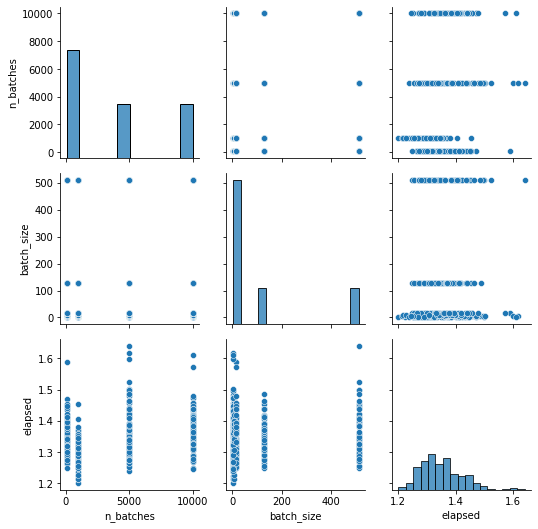

In [107]:
#Use seaborn to example behavior
import seaborn as sns
from matplotlib import pyplot as plt

pg = sns.PairGrid(data=df)
pg.map_diag(sns.histplot)
pg.map_offdiag(sns.scatterplot)
plt.show()